### This script contains the following:
#### 1. Importing Libraries & Data
#### 2. Addressing Zero values
#### 3. Deriving new varibables:  
#### 4. Exporting Data

### 1. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
# Project folder path

path=r'/Users/sukihabibe/Desktop/CareerFoundry/Portofolio_A6/World_Happiness_Report'

In [3]:
# Importing data

df=pd.read_csv(os.path.join(path, '02_Data', 'Prepared', 'dfall_4.csv'))

In [4]:
df.head()

,Unnamed: 0,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Happiness-range,GDP-range,Social-range,Healthy-range,Freedom-range,Generosity-range,Corruption-range,Region Happiness,Reg-happy-range,clusters
0,0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,...,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption,6.8984,High score,1
1,1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,...,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption,6.8984,High score,1
2,2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,...,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption,6.8984,High score,1
3,3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,...,High score,High GDP,High Social,High Healthy,High Freedom,High Generosity,Mid Corruption,6.8984,High score,1
4,4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,...,High score,High GDP,High Social,High Healthy,High Freedom,High Generosity,High Corruption,6.8984,High score,1


In [5]:
# Drop 'Unnamed:0' & Unnamed:0.1

df=df.drop("Unnamed: 0",axis=1)


### 2. Prep data for Decision Tree Regression Analysis

#### 2a. Happiness rank as 1,2,3

In [6]:
# Derive new column 'Happiness-rank'

df.loc[df['Happiness score'] < 4.5, 'Happiness-rank'] = 1

In [7]:
df.loc[(df['Happiness score'] >= 4.5) & (df['Happiness score'] < 6.5), 'Happiness-rank'] = 2

In [8]:
df.loc[df['Happiness score'] >= 6.5, 'Happiness-rank'] = 3

In [9]:
df['Happiness-rank'].value_counts(dropna=False)

2.0    457
1.0    192
3.0    133
Name: Happiness-rank, dtype: int64

In [10]:
df['Happiness-range'].value_counts(dropna=False)

Middle score    457
Low score       192
High score      133
Name: Happiness-range, dtype: int64

#### 2b. GDP rank as 1,2,3

In [11]:
# Derive new column 'Happiness-range'

df.loc[df['GDP per capita'] < 0.6, 'GDP-rank'] = 1

In [12]:
df.loc[(df['GDP per capita'] >= 0.6) & (df['GDP per capita'] < 1.2), 'GDP-rank'] = 2

In [13]:
df.loc[df['GDP per capita'] >= 1.2, 'GDP-rank'] = 3

In [14]:
df['GDP-rank'].value_counts(dropna=False)

2.0    367
3.0    222
1.0    193
Name: GDP-rank, dtype: int64

In [15]:
df.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,Social-range,Healthy-range,Freedom-range,Generosity-range,Corruption-range,Region Happiness,Reg-happy-range,clusters,Happiness-rank,GDP-rank
0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,...,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption,6.8984,High score,1,3.0,3.0
1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,...,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption,6.8984,High score,1,3.0,3.0
2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,...,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption,6.8984,High score,1,3.0,3.0
3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,...,High Social,High Healthy,High Freedom,High Generosity,Mid Corruption,6.8984,High score,1,3.0,3.0
4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,...,High Social,High Healthy,High Freedom,High Generosity,High Corruption,6.8984,High score,1,3.0,3.0


#### 2c. Social-rank as 1,2,3

In [16]:
df.loc[df['Social support'] < 1.0, 'Social-rank'] = 1

In [17]:
df.loc[(df['Social support'] >= 1.0) & (df['Social support'] < 1.25), 'Social-rank'] = 2

In [18]:
df.loc[(df['Social support'] >= 1.25), 'Social-rank'] = 3

In [19]:
df['Social-rank'].value_counts(dropna=False)

1.0    287
3.0    268
2.0    227
Name: Social-rank, dtype: int64

In [20]:
df['Social-range'].value_counts(dropna=False)

Low Social     287
High Social    268
Mid Social     227
Name: Social-range, dtype: int64

#### 2d. Healty-rank as 1,2,3

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Count'>

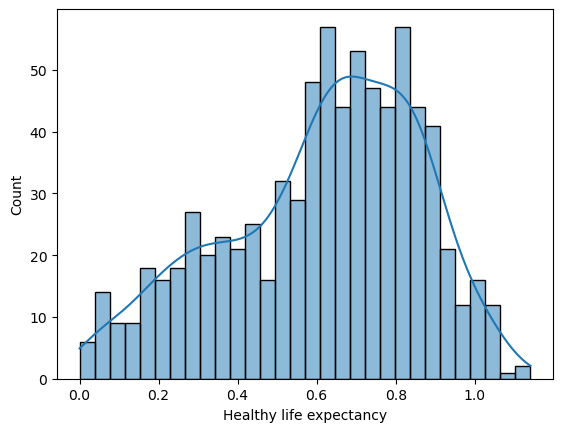

In [21]:
sns.histplot(df['Healthy life expectancy'], bins = 30, kde = True)

In [22]:
df.loc[df['Healthy life expectancy'] < 0.5, 'Healthy-rank'] = 1

In [23]:
df.loc[(df['Healthy life expectancy'] >= 0.5) & (df['Healthy life expectancy'] < 0.8), 'Healthy-rank'] = 2

In [24]:
df.loc[df['Healthy life expectancy'] >= 0.8, 'Healthy-rank'] = 3

In [25]:
df['Healthy-rank'].value_counts(dropna=False)

2.0    351
1.0    227
3.0    204
Name: Healthy-rank, dtype: int64

In [26]:
df['Healthy-range'].value_counts(dropna=False)

Mid Healthy     351
Low Healthy     227
High Healthy    204
Name: Healthy-range, dtype: int64

#### 2e. Freedom-rank as 1,2,3

In [27]:
df.loc[df['Freedom to make life choices'] < 0.3, 'Freedom-rank'] = 1

In [28]:
df.loc[(df['Freedom to make life choices'] >= 0.3) & (df['Freedom to make life choices'] < 0.5), 'Freedom-rank'] = 2

In [29]:
df.loc[df['Freedom to make life choices'] >= 0.5, 'Freedom-rank'] = 3

In [30]:
df['Freedom-range'].value_counts(dropna=False)

Mid Freedom     352
High Freedom    247
Low Freedom     183
Name: Freedom-range, dtype: int64

In [31]:
df['Freedom-rank'].value_counts(dropna=False)

2.0    352
3.0    247
1.0    183
Name: Freedom-rank, dtype: int64

#### 2f. Generocity-rank as 1,2,3

In [32]:
df.loc[df['Generosity'] < 0.15, 'Generosity-rank'] = 1

In [33]:
df.loc[(df['Generosity'] >= 0.15) & (df['Generosity'] < 0.30), 'Generosity-rank'] = 2

In [34]:
df.loc[df['Generosity'] >= 0.30, 'Generosity-rank'] = 3

In [35]:
df['Generosity-range'].value_counts(dropna=False)

Mid Generosity     378
Low Generosity     240
High Generosity    164
Name: Generosity-range, dtype: int64

In [36]:
df['Generosity-rank'].value_counts(dropna=False)

2.0    378
1.0    240
3.0    164
Name: Generosity-rank, dtype: int64

#### 2g. Corruption-rank as 1,2,3

In [37]:
df.loc[df['Perceptions of corruption'] < 0.1, 'Corruption-rank'] = 1

In [38]:
df.loc[(df['Perceptions of corruption'] >= 0.1) & (df['Perceptions of corruption'] < 0.2), 'Corruption-rank'] = 1

In [39]:
df.loc[df['Perceptions of corruption'] >= 0.2, 'Corruption-rank'] = 1

In [40]:
df['Corruption-range'].value_counts(dropna=False)

Low Corruption     425
Mid Corruption     225
High Corruption    132
Name: Corruption-range, dtype: int64

In [41]:
df['Corruption-range'].value_counts(dropna=False)

Low Corruption     425
Mid Corruption     225
High Corruption    132
Name: Corruption-range, dtype: int64

### 3. Decision Tree Regression Analysis 1

In [42]:
# Create df with only categorical variables

dfcat=df[['Happiness-rank','GDP-rank', 'Social-rank',
       'Healthy-rank', 'Freedom-rank', 'Generosity-rank',
       'Corruption-rank']]

In [43]:
dfcat.shape

(782, 7)

In [44]:
dfcat.columns

Index(['Happiness-rank', 'GDP-rank', 'Social-rank', 'Healthy-rank',
       'Freedom-rank', 'Generosity-rank', 'Corruption-rank'],
      dtype='object')

In [45]:
# Split your dataset into training and testing sets.


X = dfcat.drop(['Happiness-rank'], axis=1)
y = dfcat['Happiness-rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Create a decision tree regression model using scikit-learn
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [47]:
# Use the trained model to make predictions on the testing set.

y_pred = dt.predict(X_test)

In [48]:
# Evaluate the performance of the model using mean squared error (MSE).

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.16866059334024425


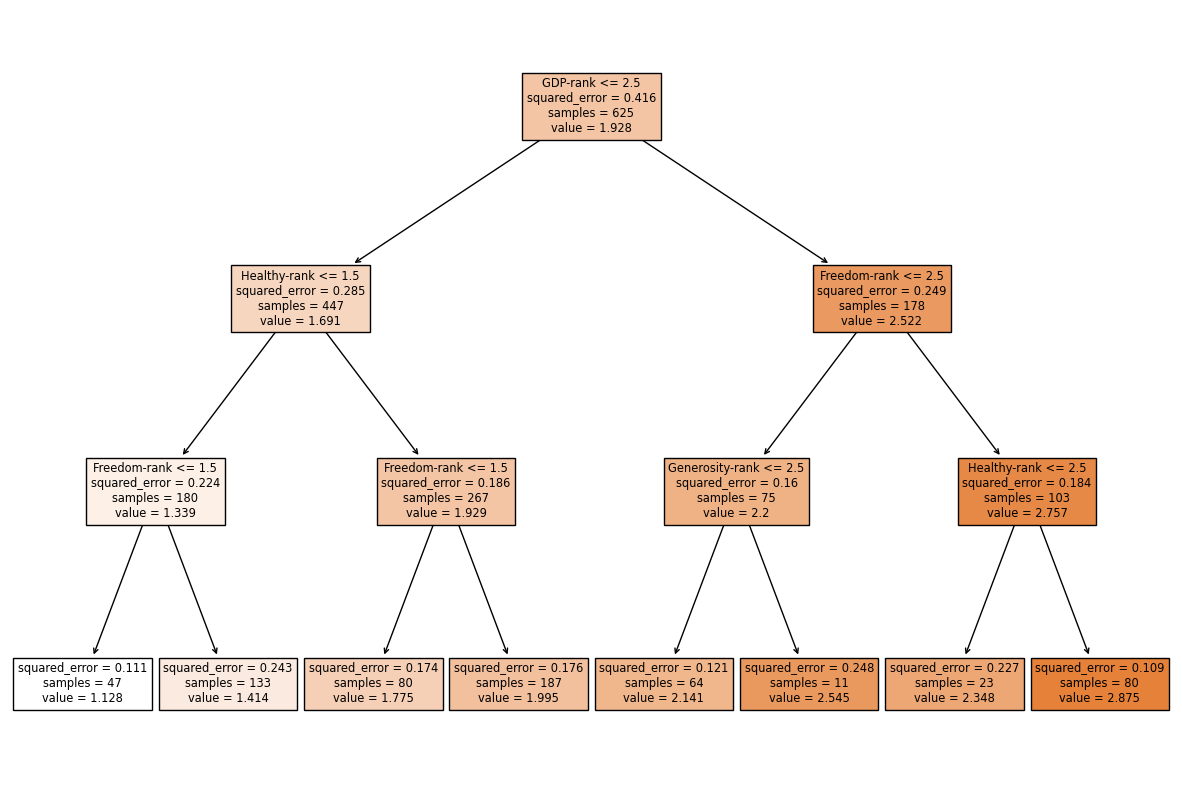

In [49]:
# Visualize the decision tree using scikit-learn's plot_tree function.

from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dt, feature_names=X_train.columns, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# make predictions on the test dataset
y_pred = dt.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

### Final Decision Tree with fewer factors. 

In [74]:
# Reduce df to the 4 factors with higher correlation to happiness.

dfnum=df[['Happiness score','GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices']]

In [75]:
# Split your dataset into training and testing sets.


X = dfnum.drop(['Happiness score'], axis=1)
y = dfnum['Happiness score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Create a decision tree regression model using scikit-learn
from sklearn.tree import DecisionTreeRegressor

dt2 = DecisionTreeRegressor(max_depth=3)
dt2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [77]:
# Use the trained model to make predictions on the testing set.

y_pred = dt2.predict(X_test)

In [78]:
# Evaluate the performance of the model using mean squared error (MSE).

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  0.3653075180695578


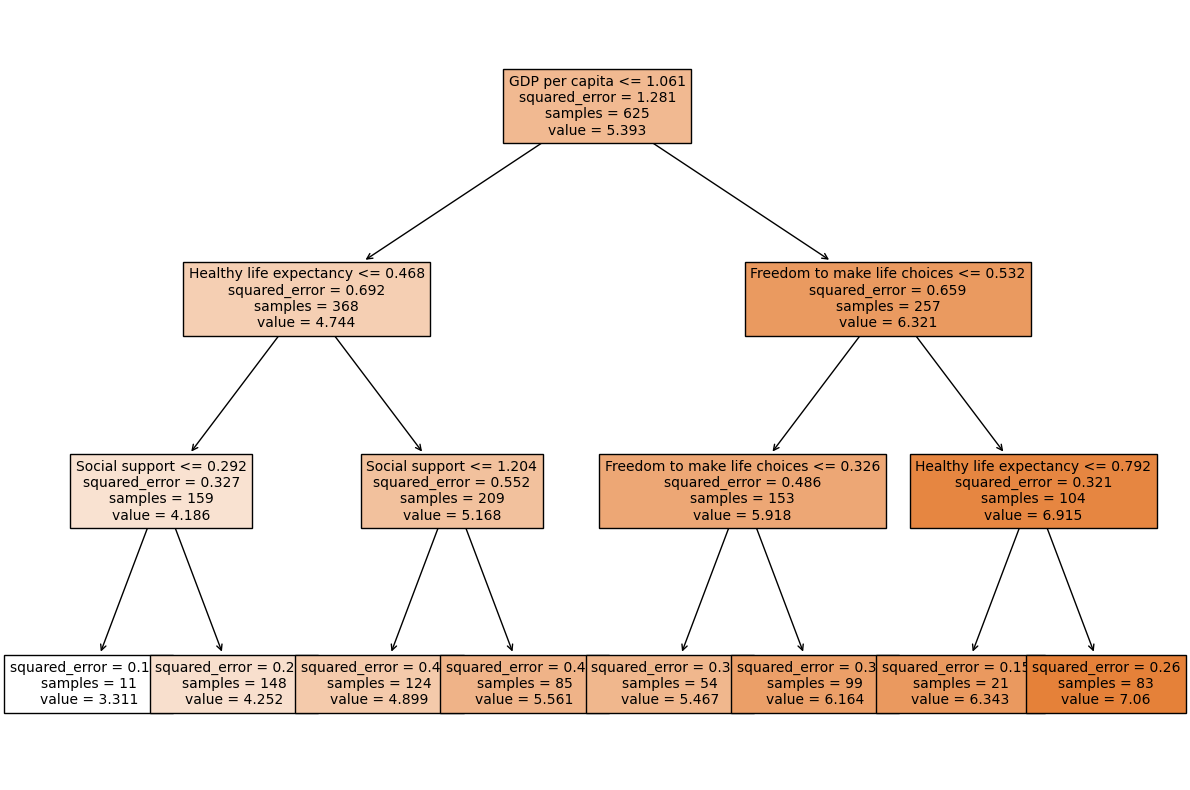

In [80]:
# # Visualize the decision tree using scikit-learn's plot_tree function.

plt.figure(figsize=(15,10))
plot_tree(dt2, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

### 4. Exporting data

In [50]:
# Export cust_ords_prods as "cop_dep.pkl"
df.to_csv(os.path.join(path, '02_Data', 'Prepared','dfall_5.csv'))